In [2]:
import pandas as pd
import numpy as np
import easygui
import scipy.optimize

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter

import kin
import trmc

mpl.rc('font',**{'size' : 14})

class exp_formatter(): 
    """used to format exponentials of ticks"""
    def __init__(self,exponent):
        self.exponent = exponent
    
    def format_func(self,value, tick_number):
        return ("{:0=1.0f}").format(value/10**self.exponent)
#         return ("{:0=1.0f}e" + str(self.exponent)).format(value/10**self.exponent)

defaultpath = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel'

labels = {'A': 'Sample A (0.00% Bi)','B': 'Sample B (0.01% Bi)','K': 'Sample K','C2': 'Sample C2', 'N' : 'Sample N' }

# Fitting of cavity data

[8.59436291e+09 1.55880653e+07 6.54914407e-01]
[8.54241841e+09 1.47863477e+07 6.31276724e-01]
[8.55905904e+09 2.86652283e+07 6.71691580e-01]
[8.54833693e+09 2.17791871e+07 5.68628896e-01]
[8.55992723e+09 2.11368010e+07 5.69878697e-01]


(8420000000.0, 8652000000.0)

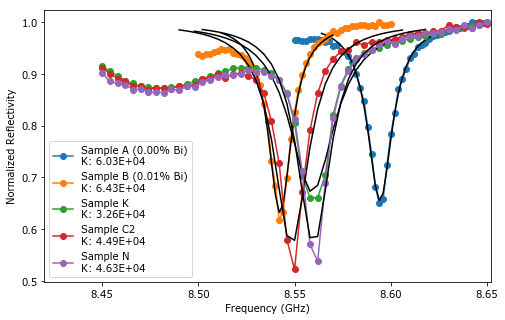

In [42]:
fp_sw_A = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Sweep_exp.csv'
fp_sw_B = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Sweep_exp.csv'
fp_sw_K = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Sweep_exp.csv'
fp_sw_C2 = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Sweep_exp.csv'
fp_sw_N = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Sweep_exp.csv'

fps = {'A': fp_sw_A,'B': fp_sw_B,'K': fp_sw_K,'C2': fp_sw_C2,'N': fp_sw_N }
# del fps['A']
# del fps['B']

swps = []
maxV = {}
for samp in fps:
    df = pd.read_csv(fps[samp], index_col = 0)
    swps.append(df['Experimental R'])
    maxV[samp] = 0.012#df[' Vsignal(V)'].max()

swps = dict(zip(fps.keys(),swps))

back_V_fit = {} #Forgot to copy values sometimes, so using the Vsignal max value and R0 to estimate background voltage
K = {}

fig, ax = plt.subplots(1,figsize = (8,5))
for sample in swps:
    sweep = swps[sample]
    xdata = sweep.index.values
    ydata = sweep.values
    
    minidx = ydata.argmin()
    minfreq = xdata[minidx]
    

    p0 =[minfreq,1e7,.5]
    bounds = ([0,0,0],[np.inf,np.inf,np.inf])
    window = 15
    sl = slice(minidx-window,minidx+window)
    popt,popc = scipy.optimize.curve_fit(trmc.lor,xdata[sl],ydata[sl], p0 , bounds = bounds)
    fit_func = trmc.lor(xdata,*popt)
    print(popt)

    K[sample] = trmc.calc_K(f0 = popt[0], w = popt[1], R0 = popt[2], printparams = False)
    back_V_fit[sample] = -maxV[sample]*popt[2]
    
    ax.plot(sweep, marker = 'o', label = (labels[sample] + "\nK: " + str("{:0.2E}".format(K[sample]))))
    ax.plot(xdata[sl],fit_func[sl] , color = 'black')
    ax.set_xlabel('Frequency (GHz)')
    ax.set_ylabel('Normalized Reflectivity')
ax.legend()
ax.xaxis.get_offset_text().set_visible(False)
ax.set_xlim(8.42e9,8.652e9)

# Pull in and plot trmc data

In [43]:

fp_A = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=01_Fluence=6.45E+14_data.csv','C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=02_Fluence=5.121E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=03_Fluence=4.07E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=04_Fluence=3.231E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=05_Fluence=2.567E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=06_Fluence=2.038E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=07_Fluence=1.619E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=08_Fluence=6.45E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=09_Fluence=3.231E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=10_Fluence=6.45E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=11_Fluence=6.45E+11_data.csv']
fp_B = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=01_Fluence=4.573E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=02_Fluence=3.631E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=03_Fluence=2.886E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=04_Fluence=2.291E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=05_Fluence=1.82E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=06_Fluence=1.445E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=07_Fluence=1.148E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=08_Fluence=4.573E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=09_Fluence=2.291E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=10_Fluence=4.573E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=11_Fluence=4.573E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=12_Fluence=4.573E+10_data.csv']
fp_K = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=01_Fluence=2.89E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=02_Fluence=2.295E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=03_Fluence=2.89E+09_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=04_Fluence=1.448E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=05_Fluence=2.89E+08_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=06_Fluence=9.132E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=07_Fluence=7.259E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=08_Fluence=2.89E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=09_Fluence=1.448E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=10_Fluence=2.89E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=11_Fluence=2.89E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=12_Fluence=2.89E+10_data.csv']
fp_C2 = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=01_Fluence=2.89E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=02_Fluence=2.295E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=03_Fluence=2.89E+09_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=04_Fluence=1.448E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=05_Fluence=2.89E+08_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=06_Fluence=9.132E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=07_Fluence=7.259E+13_data.csv','C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=08_Fluence=2.89E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=09_Fluence=1.448E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=10_Fluence=2.89E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=11_Fluence=2.89E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample C\\Fluence Sweep\\High_Power_Filter=12_Fluence=2.89E+10_data.csv']
fp_N = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=01_Fluence=2.89E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=02_Fluence=2.295E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=03_Fluence=2.89E+09_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=04_Fluence=1.448E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=05_Fluence=2.89E+08_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=06_Fluence=9.132E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=07_Fluence=7.259E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=08_Fluence=2.89E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=09_Fluence=1.448E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=10_Fluence=2.89E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=11_Fluence=2.89E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=12_Fluence=2.89E+10_data.csv']
#fp_N = easygui.fileopenbox(default=defaultpath,multiple=True)

fps = {'A': fp_A,'B': fp_B,'K': fp_K,'C2': fp_C2,'N': fp_N }

In [44]:
dfs_V = {}

for samp in fps:
    dfs_V[samp], back_V_csv = trmc.load(fps[samp], offsettime = 50e-9, sub_lowpow = True) 
    dfs_V[samp] = trmc.offsettime(dfs_V[samp], timebefore = 50e-9, timeafter = 500-9)

C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

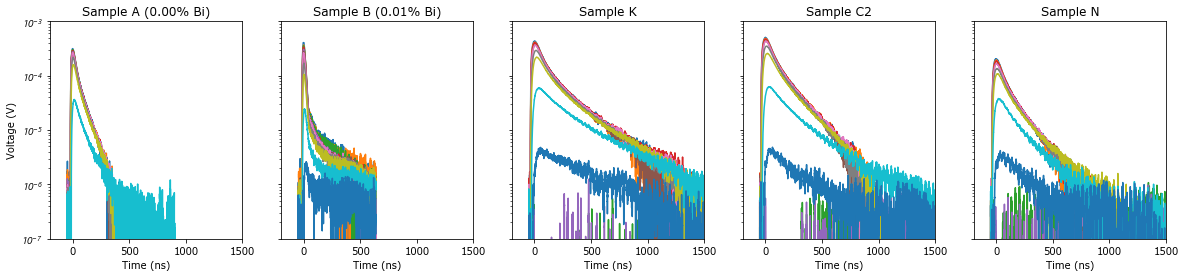

In [45]:
fig, axes = plt.subplots(1,5, sharey = True, figsize = (20,4))

insets = [0,0,0,0,0]

for i, sample in enumerate(dfs_V):
    axes[i].plot(dfs_V[sample])
    axes[i].set_title(labels[sample])
    axes[i].set_xlim(-200e-9,1.5e-6)
    
    left, bottom, width, height = [0.035+ 0.202*(i+1), 0.62, 0.05, 0.2]
#     insets[i] = fig.add_axes([left, bottom, width, height])
#     insets[i].plot(np.flip(dfs_V[sample].columns,0), marker = 'o')
#     insets[i].set_ylim(2e11,1e15)
#     insets[i].set_yscale('log')
#     insets[i].set_ylabel('Fluence\n$(\#/cm^2)$ ')
#     insets[i].set_xlabel('Meas #')

axes[0].set_yscale('log')
axes[0].set_ylim(1e-7,1e-3)
axes[0].set_ylabel('Voltage (V)')

for ax in axes:
    ax.set_xlabel('Time (ns)')
    expf = exp_formatter(-9)
    ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
    ax.xaxis.get_offset_text().set_visible(False)

C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

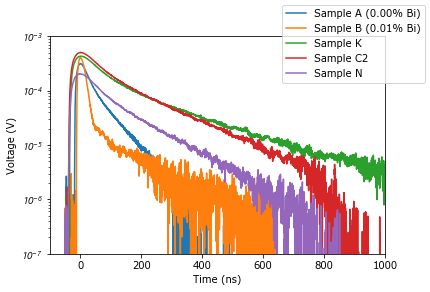

In [46]:
fig, ax= plt.subplots()

insets = [0,0,0,0,0]

for i, sample in enumerate(dfs_V):
    dfs = dfs_V[sample]
    ax.plot(dfs[dfs.columns[0]], label = labels[sample])


ax.set_yscale('log')
ax.set_ylim(1e-7,1e-3)
ax.set_xlim(-100e-9,1e-6)
ax.set_ylabel('Voltage (V)')


ax.set_xlabel('Time (ns)')
expf = exp_formatter(-9)
ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
ax.xaxis.get_offset_text().set_visible(False)


fig.legend()

In [48]:
dfs_cond = {}

for samp in fps:
    print('Background V of', samp, ": " ,"{:0.3f}".format(back_V_fit[samp]))
#     print('K of ', samp, ": " ,K[samp])
    dfs_cond[samp] = trmc.convert_V2cond(dfs_V[samp],back_V_fit[samp],K[samp])

Background V of A :  -0.008
Background V of B :  -0.008
Background V of K :  -0.008
Background V of C2 :  -0.007
Background V of N :  -0.007


C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

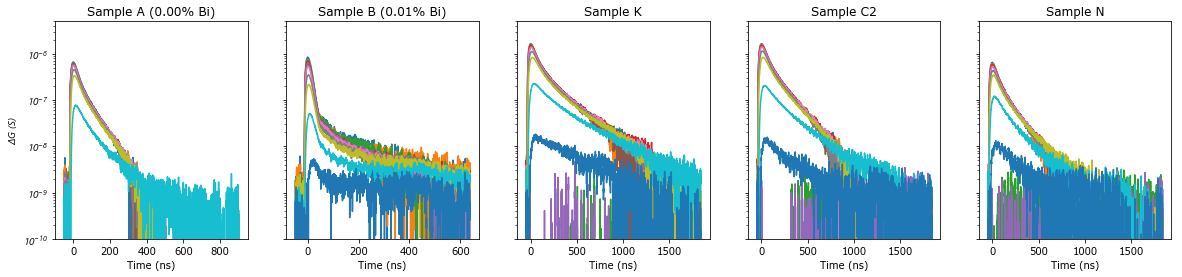

In [57]:
fig, axes = plt.subplots(1,5, sharey = True, figsize = (20,4))

for i, sample in enumerate(dfs_cond):
    axes[i].plot(dfs_cond[sample])
    axes[i].set_title(labels[sample])
    
#     left, bottom, width, height = [0.035+ 0.202*(i+1), 0.62, 0.05, 0.2]
#     insets[i] = fig.add_axes([left, bottom, width, height])
#     insets[i].plot(np.flip(dfs_V[sample].columns,0), marker = 'o')
#     insets[i].set_ylim(1e11,1e15)
#     insets[i].set_yscale('log')
#     insets[i].set_ylabel('Fluence\n$(\#/cm^2)$ ')
#     insets[i].set_xlabel('Meas #')

axes[0].set_yscale('log')
axes[0].set_ylim(1e-10,5e-6)
axes[0].set_ylabel('$\Delta$G (S)')


for ax in axes:
    ax.set_xlabel('Time (ns)')
    expf = exp_formatter(-9)
    ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
    ax.xaxis.get_offset_text().set_visible(False)

# Pull in and plot transmission data

In [52]:
# filepath = easygui.fileopenbox(default=defaultpath)
fp_quartz = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\Quartz_4mm_newbaseline.txt'
quartz = pd.read_csv(fp_quartz, skiprows = 2,index_col = 0, squeeze=True)/100

# fp_data = easygui.fileopenbox(default=defaultpath)
fp_T_A = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleA_remres.txt'
fp_T_B = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleB_remres.txt'
fp_T_C = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleC_remres.txt'
fp_T_D = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleD_remres.txt'

fps = {'A': fp_T_A,'B': fp_T_B,'C': fp_T_C,'D': fp_T_D }

T = pd.DataFrame(columns = fps.keys())
for samp in fps:
    T[samp] = pd.read_csv(fps[samp], skiprows = 2,index_col = 0,squeeze = True)/100

FileNotFoundError: File b'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\Quartz_4mm_newbaseline.txt' does not exist

Transmittance  A :  0.0011553442925991944
Transmittance  B :  0.12155322286041241
Transmittance  C :  0.0014414295460047093
Transmittance  D :  0.011454413415197727


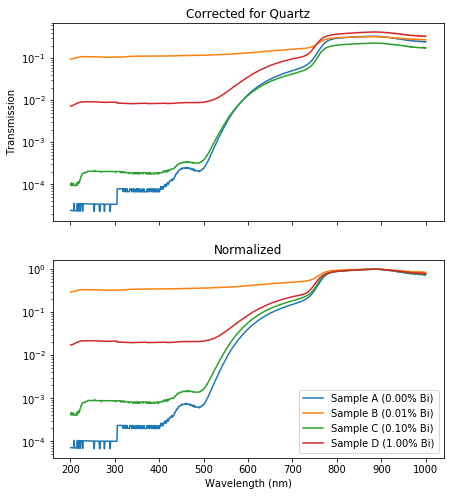

In [9]:
#Correct for quartz
T_corr = T.copy()
for samp in T_corr:
    T_corr[samp] = T[samp]/quartz
    
#normalize to maximum value    
T_norm = T_corr.copy()
for samp in T_norm:
    T_norm[samp] = T_corr[samp]/T_norm[samp].max()

fig, axes = plt.subplots(2,1, figsize = (7,8), sharex = True)

for samp in T.columns:
#     axes[0].plot(T[samp], label = samp)
    axes[0].plot(T_corr[samp], label = labels[samp])
    axes[1].plot(T_norm[samp], label = labels[samp])
    print("Transmittance ", samp, ': ', str(T_corr[samp][532.0]))

# axes[0].plot(quartz, label = 'Quartz')
# axes[0].set_title('Raw Data')
axes[0].set_title('Corrected for Quartz')
axes[1].set_title('Normalized')

axes[0].set_ylabel('Transmission')
axes[1].legend()
axes[1].set_xlabel('Wavelength (nm)')

for ax in axes:
    
    ax.set_yscale('log')

Absorbance  A :  0.9988446557074008
Absorbance  B :  0.8784467771395876
Absorbance  C :  0.9985585704539953
Absorbance  D :  0.9885455865848023


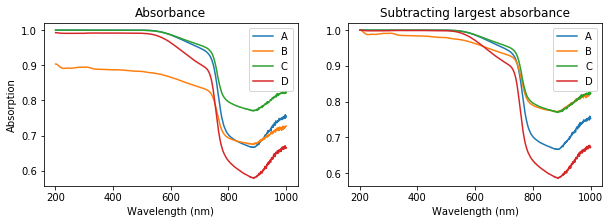

In [10]:
#Absorbance
A = T_corr.copy()
for samp in T_corr:
    A[samp] = 1-T_corr[samp]
    
#subtraced absorbance
A_sub = A.copy()
for samp in A:
    A_sub[samp] = A[samp]-(A[samp].max()-1)


fig, axes = plt.subplots(1,2, figsize = (10,3))

FAs = {}

for samp in T.columns:
    axes[0].plot(A[samp], label = samp)
    axes[1].plot(A_sub[samp], label = samp)
    FAs[samp] = A[samp][532.0]
    print("Absorbance ", samp, ': ', str(FAs[samp]))

# axes[0].plot(quartz, label = 'Quartz')
axes[0].set_title('Absorbance')
axes[1].set_title('Subtracting largest absorbance')
# axes[2].set_title('Corrected and Normalized to max')
    
axes[0].set_ylabel('Absorption')
for ax in axes:
    ax.set_xlabel('Wavelength (nm)')
    ax.legend()
#     ax.set_yscale('log')

# calculate figure of merit

In [53]:
params = {
    'beta' : 2.25
}

cav_A = 22.86*10.16 ##mm^2

FAs = {'A': 1,'B': 0.87,'K': 1,'C2': 1,'N': 1}
masking = {'A': 0.25,'B': 0.25,'K': 0.25,'C2': 0.25,'N': 0.25}
print('Masking Factors')
for sample in masking:
    print('Sample ', sample, ": ", "{:0.3f}".format(masking[sample]))
print('Fractional Absorbance')
for sample in FAs:
    print('Sample ', sample, ": ", "{:0.3f}".format(FAs[sample]))

Masking Factors
Sample  A :  0.250
Sample  B :  0.250
Sample  K :  0.250
Sample  C2 :  0.250
Sample  N :  0.250
Fractional Absorbance
Sample  A :  1.000
Sample  B :  0.870
Sample  K :  1.000
Sample  C2 :  1.000
Sample  N :  1.000


C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

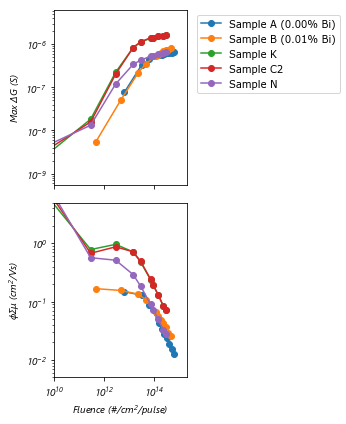

In [68]:
fig, axes = plt.subplots(2,1, sharex = True, figsize = (5,6))

maxmob = pd.Series(index = dfs_cond.keys())

for i,sample in enumerate(dfs_cond):
    df = dfs_cond[sample]
    params['M'] = masking[sample]
    params['FA'] = FAs[sample]
    maxG, fom = trmc.maxG_and_fom(df,params)
    fom = fom.sort_index()
    maxG = maxG.sort_index()
    maxmob[sample] = fom.max()
    
    axes[0].plot(maxG,marker = 'o', label = labels[sample])    
    axes[1].plot(fom,marker = 'o', label = labels[sample])

axes[0].set_ylabel('Max $\Delta G \ (S)$')
axes[1].set_xlim(1e10,2e15)
axes[1].set_ylabel('$\phi\Sigma\mu \ (cm^2/Vs)$')
axes[1].set_xlabel('$Fluence \ (\#/cm^2/pulse)$ ')
axes[1].set_ylim(5e-3,5e0)
axes[0].legend(bbox_to_anchor=(1.04,1), loc="upper left")

for ax in axes:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.margins(0.2)
    
fig.tight_layout()

# half-life calculation

In [73]:
sers_hl = {}
# sample = 'A'

# from matplotlib.ticker.ScalarFormatter import ScalarFormatter

for i, sample in enumerate(dfs_cond):
    df = trmc.offsettime(dfs_cond[sample])
    df[df.columns[::-1]]
    df = df.iloc[0:1000,:]
    times = df.index
    df_max = df.max()
    t_hls = []
    fluences = df_max.index
    for fluence in fluences:
        maximum = df_max[fluence]
        time_max = abs(df[fluence] - maximum).idxmin()
        time_half = abs(df[fluence] - maximum/2).idxmin()
        t_hls.append(time_half-time_max)
    sers_hl[sample] = pd.Series(t_hls, index = df_max.index).sort_index()
    
    
    


C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\aspit\AppData\

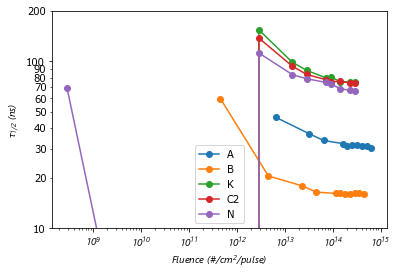

In [74]:
fig, ax = plt.subplots()

for sample in sers_hl:
    scaled_data = sers_hl[sample]
    ax.plot(scaled_data, label = sample, marker = 'o')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel('$\\tau_{1/2}$ (ns)')
ax.set_xlabel('$Fluence \ (\#/cm^2/pulse)$ ')

# ax.yaxis.set_minor_formatter(FormatStrFormatter("%d"))
# ax.yaxis.set_minor_formatter(FuncFormatter(lambda y, _: '{:.2e}'.format(y/1e-9))) 

expf = exp_formatter(-9)
ax.yaxis.set_minor_formatter(FuncFormatter(expf.format_func))
ax.yaxis.set_major_formatter(FuncFormatter(expf.format_func))
ax.yaxis.get_offset_text().set_visible(False)

ax.set_ylim(10e-9,200e-9)

ax.legend()